# Simple posteriors 


In [32]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

In [33]:
tfd = tfp.distributions

In [34]:
generator = tfd.Binomial(total_count=60, probs = 0.6)

In [35]:
sample = generator.sample(1)

In [36]:
sample.numpy()

array([35.], dtype=float32)

In [37]:
# Uniform prior

In [73]:
n_points = 100
thetas = tf.linspace(start = 0.0, stop = 1.0, num=n_points)
prior = tf.ones(n_points)/n_points

In [74]:
models = tfd.Binomial(total_count = 60, probs = thetas)

In [75]:
likelihood = models.prob(sample)
posterior = prior * likelihood
posterior /= tf.reduce_sum(posterior)
posterior

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.91455428e-33, 3.62263210e-30, 1.63774130e-27, 2.75425756e-25,
       2.24420893e-23, 1.05058138e-21, 3.17416828e-20, 6.72497476e-19,
       1.06218924e-17, 1.31025396e-16, 1.30868115e-15, 1.08907778e-14,
       7.72734809e-14, 4.76360867e-13, 2.59146198e-12, 1.26038919e-11,
       5.54121332e-11, 2.22289742e-10, 8.20239210e-10, 2.80346502e-09,
       8.92905927e-09, 2.66424038e-08, 7.48197309e-08, 1.98574341e-07,
       4.99882788e-07, 1.19746051e-06, 2.73748287e-06, 5.98770248e-06,
       1.25602528e-05, 2.53201015e-05, 4.91444807e-05, 9.19941813e-05,
       1.66334197e-04, 2.90892931e-04, 4.92663239e-04, 8.08949582e-04,
       1.28907838e-03, 1.99532229e-03, 3.00244940e-03, 4.39516595e-03,
       6.26311079e-03, 8.69281497e-03, 1.17570944e-02, 1.55020570e-02,
       1.99332256e-02, 2.50030123e-02, 3.06006931e-02, 3.65481712e-02,
       4.26031649e-02, 4.8470

In [76]:
import matplotlib.pyplot as plt

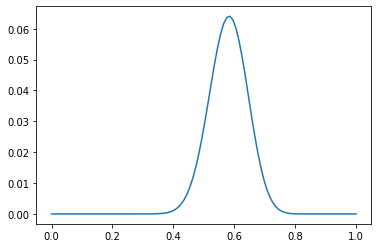

In [77]:
plt.plot(thetas, posterior)

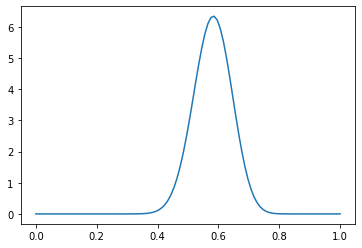

In [85]:
import scipy.stats
plt.plot(thetas, scipy.stats.beta.pdf(thetas, 1 + sample, 1 + 60 - sample))